In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, accuracy_score,
                             precision_score, recall_score, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Cargar dataset con ingeniería de variables
df = pd.read_csv("HR_Em_Attrition_Engineered.csv")


In [3]:
# Definir target y features del Modelo 1 seleccionado
y = df['Attrition']
features_model1 = [
    'OverTime_Yes', 'BusinessTravel_Travel_Frequently', 'Log_MonthlyIncome',
    'YearsSinceLastPromotion', 'MaritalStatus_Single', 'NumCompaniesWorked',
    'EnvironmentSatisfaction', 'YearsAtCompany', 'YearsWithCurrManager', 'JobSatisfaction'
]
X = df[features_model1]

In [4]:
# Dividir dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [5]:
# Entrenar modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [6]:
# Predicciones y probabilidades
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [7]:
# Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
ks = max(tpr - fpr)

cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"KS: {ks:.3f}")
print("\nMatriz de Confusión:")
print(cm)


Accuracy: 0.855
Precision: 0.613
Recall: 0.268
KS: 0.545

Matriz de Confusión:
[[358  12]
 [ 52  19]]


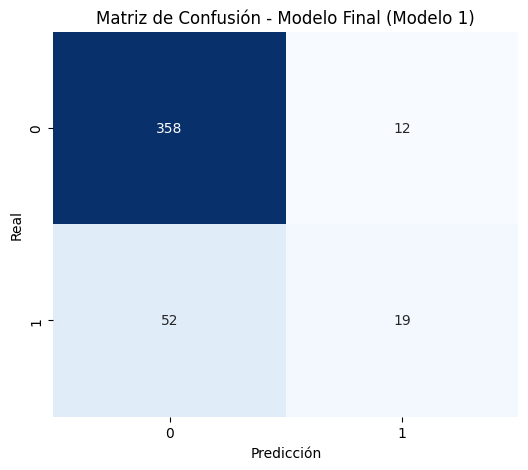

In [8]:
# Visualización matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusión - Modelo Final (Modelo 1)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [10]:
# Comparación con baseline (valores duros del baseline)
print("\nComparación con Modelo Baseline:")
print("Baseline Accuracy: 0.841, Precision: 0.667, Recall: 0.028, KS: 0.299")
print(f"Mejora en Accuracy: {acc - 0.841:.3f}")
print(f"Mejora en Precision: {prec - 0.667:.3f}")
print(f"Mejora en Recall: {rec - 0.028:.3f}")
print(f"Mejora en KS: {ks - 0.299:.3f}")


Comparación con Modelo Baseline:
Baseline Accuracy: 0.841, Precision: 0.667, Recall: 0.028, KS: 0.299
Mejora en Accuracy: 0.014
Mejora en Precision: -0.054
Mejora en Recall: 0.240
Mejora en KS: 0.246
